In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import os
import sys
import chunk
import json

from pdf2image import convert_from_path

from PyPDF2 import PdfReader
import fitz

In [2]:
DS_PATH = "../datasets/all_ds/SciTSR/"

In [3]:
train_names, test_names = os.listdir(DS_PATH + "train/img"), os.listdir(DS_PATH + "test/img")

In [4]:
def imshow(image, fac=50):
    fig = plt.figure(figsize=(image.shape[0]/fac, image.shape[1]/fac))
    ax = fig.add_subplot()
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])


def colanshow(image, mask, fac=15, mi=0, ma=1, alpha=0.7, gamma=0.3):
    fig, ax = plt.subplots(1, 2, figsize=(image.shape[0]/fac, image.shape[1]/fac))
    ax[0].imshow(image, cmap="gray", vmin=mi, vmax=1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    col_image = cv2.addWeighted(image, alpha, mask, gamma, 0)
    # col_image = image + mask * alpha
    # print(np.unique(col_image))
    ax[1].imshow(col_image, cmap="gray", vmin=mi, vmax=1)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()

In [40]:
def translate_points(src, srcSize, dstSize):
    sx0, sy0, sx1, sy1 = src
    ssx, ssy = srcSize
    dsx, dsy = dstSize

    dx0 = sx0 / ssx * dsx
    dx1 = sx1 / ssx * dsx
    dy0 = sy0 / ssy * dsy
    dy1 = sy1 / ssy * dsy
    return int(dx0), int(dy0), int(dx1), int(dy1)

orig shape (595, 841)
img shape (577, 1204)
mask shape (577, 1204)
82 24 122 31
180 21 298 34
340 21 372 34
396 24 506 31
530 24 604 31
628 24 710 31
748 24 820 31
844 24 912 31
936 24 1056 31
1080 24 1172 31
52 46 150 55
254 46 298 54
332 46 372 54
460 46 506 54
558 46 604 54
664 46 710 54
774 46 820 54
866 46 912 54
1010 46 1056 54
1162 46 1172 54
52 67 150 78
254 67 298 75
342 67 372 75
440 67 506 75
548 67 604 75
664 67 710 75
764 67 820 75
866 67 912 75
1000 67 1056 75
1162 67 1172 75
52 90 150 99
254 90 298 97
332 90 372 97
440 90 506 97
558 90 604 97
664 90 710 97
774 90 820 97
866 90 912 97
1010 90 1056 97
1162 90 1172 97
52 111 150 121
254 111 298 118
342 111 372 118
440 111 506 118
558 111 604 118
664 111 710 118
744 111 820 118
866 111 912 118
980 111 1056 118
1152 111 1172 118
52 132 150 142
254 132 298 139
342 132 372 139
440 132 506 139
558 132 604 139
664 132 710 139
744 132 820 139
866 132 912 139
980 132 1056 139
1152 132 1172 139
58 154 144 165
254 154 298 162
342 154

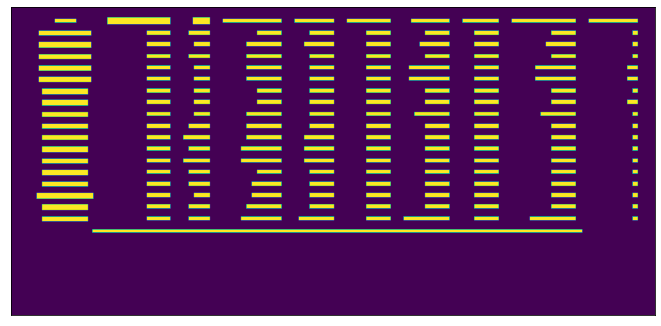

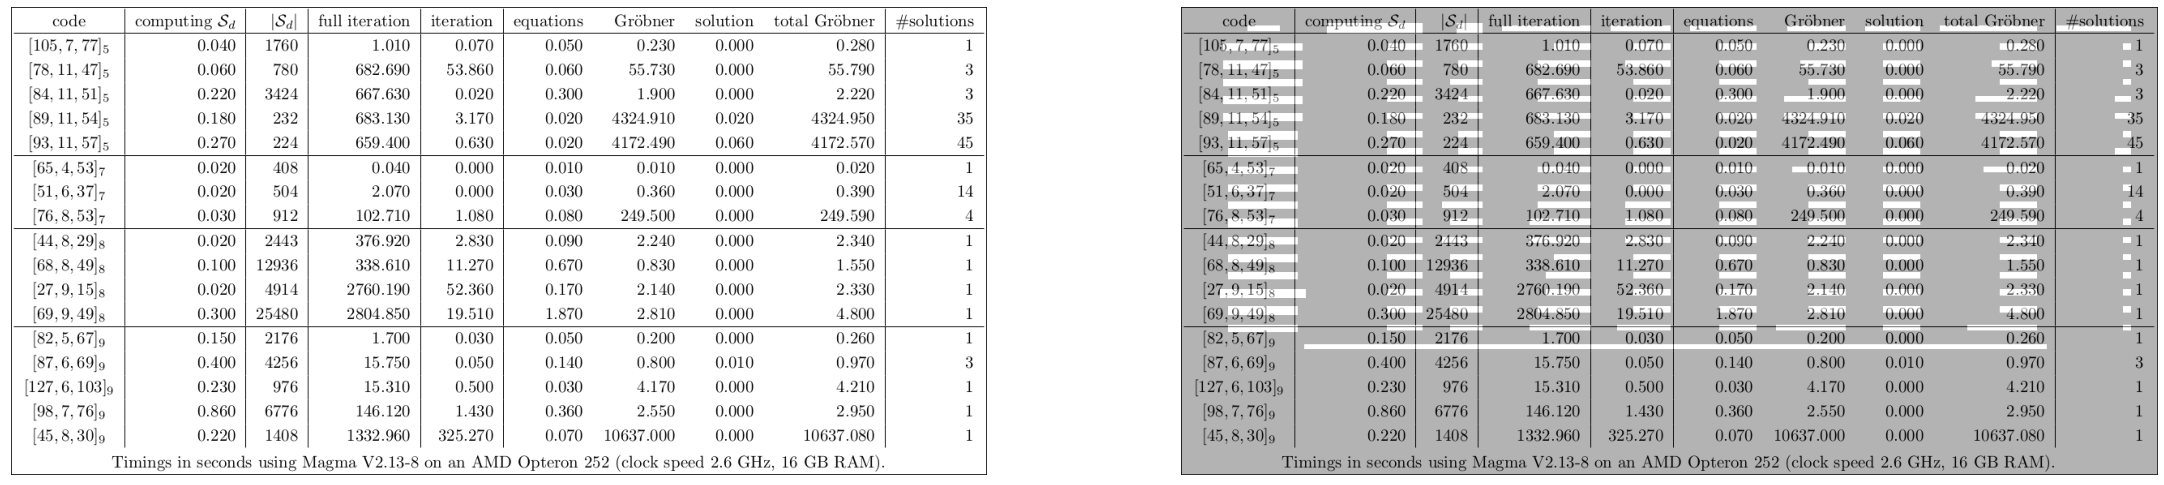

In [75]:
# images = []
# positions = []
for name in train_names[:1]:
    name = "0704.2596v1.2.png"
    b_n, ext = os.path.splitext(name)
    
    orig_shape = PdfReader(DS_PATH + "train/pdf/" + b_n + ".pdf").pages[0].mediabox
    orig_shape = tuple(int(i) for i in orig_shape)[2:]
    print("orig shape", orig_shape)
    img = cv2.imread(DS_PATH + "train/img/" + name, cv2.IMREAD_GRAYSCALE)
    print("img shape", img.shape)
    mask = np.zeros_like(img)
    print("mask shape", mask.shape)
    with open(DS_PATH + "train/chunk/" + b_n + ".chunk", "rb") as ch_file:
        chunk_file = chunk.Chunk(ch_file, inclheader=True)
        con = chunk_file.read().decode("utf-8")
        con = '{"chunks' + con

        for pos in json.loads(con)["chunks"]:
            x1, x2 = int(pos["pos"][0]), int(pos["pos"][1])
            y1, y2 = orig_shape[0] - int(pos["pos"][3]), orig_shape[0] - int(pos["pos"][2])

            # print("shape x", img.shape[0], orig_shape[0])
            # print("shape y", img.shape[1], orig_shape[1])
            # print("ratio", img.shape[0] / orig_shape[0])
            # x1 = int(x1 * max(mask.shape[1] / orig_shape[1], orig_shape[1] / mask.shape[1]))
            x1 = int(x1 * 2)
            x2 = int(x2 * 2)
            y1 = int(y1 * 1.5)
            y2 = int(y2 * 1.5) 
            # x2 = int(x2 * mask.shape[1] / orig_shape[1])
            # y1 = int(y1 * mask.shape[0] / orig_shape[0])
            # y2 = int(y2 * mask.shape[0] / orig_shape[0])
            print(x1, y1, x2, y2)
            # x1, y1, x2, y2 = translate_points((x1, y1, x2, y2), orig_shape, img.shape)
            # mask = cv2.rectangle(mask, left_up, bottom_down, 0, 50)
            mask[y1:y2, x1:x2] = 255
            # break

    # img = cv2.resize(img, (512, 512)) / 255
    # mask = cv2.resize(mask, (512, 512)) / 255
    img = img / 255
    mask = mask / 255
    # images.append(img)
    imshow(mask)
    colanshow(img, mask)

In [22]:
images[0].shape

(512, 512)